- Os dados marcados como #N/D (não deverão entrar nos gráficos) são diferentes dos dados N/D. ### [V]

- Preste atenção nos tipos de dados que estão usados. ###fillna no campo

- Quando se tratar de um campo numérico e a célula estiver vazia, deverá ser considerado como zero. (Usar o Python para a mudança e não o excel)

 

Requisitos obrigatórios:

- Usar a linguagem Python

- Usar o iPython, jupyter notebook ou qualquer outro que gere arquivos ipynb.

 

Diferencial:

 

- Fazer os mesmos gráficos utilizando o dash/plotly e subir para um servidor heroku.

https://dash.plot.ly/

https://devcenter.heroku.com/articles/getting-started-with-python

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_excel('dados_teste.xlsx')

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 14 columns):
Quem                                 2185 non-null object
Personalidade                        2114 non-null object
Entidade_Representativa              2113 non-null object
Categoria_Participante               2110 non-null object
Subcategoria_Participante            837 non-null object
Sub_subcategoria_Participante        100 non-null object
Sub_sub_subcategoria_Participante    3 non-null object
Estatal                              2113 non-null object
Numero_Manifestacoes                 2036 non-null object
Sim_impacto                          581 non-null object
Nao_impacto                          552 non-null object
N/D_impacto                          1473 non-null object
N/A_impacto                          262 non-null object
N/C_impacto                          92 non-null object
dtypes: object(14)
memory usage: 239.1+ KB


In [4]:
dados.shape

(2185, 14)

In [6]:
dados.describe()

,Quem,Personalidade,Entidade_Representativa,Categoria_Participante,Subcategoria_Participante,Sub_subcategoria_Participante,Sub_sub_subcategoria_Participante,Estatal,Numero_Manifestacoes,Sim_impacto,Nao_impacto,N/D_impacto,N/A_impacto,N/C_impacto
count,2185,2114,2113,2110,837,100,3,2113,2036,581,552,1473,262,92
unique,2185,4,3,8,33,4,1,3,78,39,31,61,20,3
top,Pessoa 2025,PF,Não,Indivíduo interessado,Alimentos,Federal,N/D,Não,1,1,N/D,1,N/D,N/D
freq,1,1096,1739,605,155,55,3,1939,455,152,137,349,90,90


In [35]:
dados.head()

,Quem,Personalidade,Entidade_Representativa,Categoria_Participante,Subcategoria_Participante,Sub_subcategoria_Participante,Sub_sub_subcategoria_Participante,Estatal,Numero_Manifestacoes,Sim_impacto,Nao_impacto,N/D_impacto,N/A_impacto,N/C_impacto
0,Pessoa 1,PJ,Sim,Agente econômico regulado,NaN,NaN,NaN,Não,2,NaN,2,NaN,NaN,NaN
1,Pessoa 2,PJ,Sim,Agente econômico regulado,Alimentos;Insumos Farmacêuticos,NaN,NaN,Não,8,3,5,NaN,NaN,NaN
2,Pessoa 3,PF,Não,Profissional de saúde,NaN,NaN,NaN,Não,9,2,7,NaN,NaN,NaN
3,Pessoa 4,PF,Não,Profissional de saúde,NaN,NaN,NaN,Não,6,1,5,NaN,NaN,NaN
4,Pessoa 5,PJ,Sim,Outros,"Conselho, sindicato ou associação de profissio...",NaN,NaN,Não,17,1,16,NaN,NaN,NaN


In [8]:
dados.dtypes

Quem                                 object
Personalidade                        object
Entidade_Representativa              object
Categoria_Participante               object
Subcategoria_Participante            object
Sub_subcategoria_Participante        object
Sub_sub_subcategoria_Participante    object
Estatal                              object
Numero_Manifestacoes                 object
Sim_impacto                          object
Nao_impacto                          object
N/D_impacto                          object
N/A_impacto                          object
N/C_impacto                          object
dtype: object

In [9]:
dados.columns

Index(['Quem', 'Personalidade', 'Entidade_Representativa',
       'Categoria_Participante', 'Subcategoria_Participante',
       'Sub_subcategoria_Participante', 'Sub_sub_subcategoria_Participante',
       'Estatal', 'Numero_Manifestacoes', 'Sim_impacto', 'Nao_impacto',
       'N/D_impacto', 'N/A_impacto', 'N/C_impacto'],
      dtype='object')

In [10]:
dados.isnull().sum()

Quem                                    0
Personalidade                          71
Entidade_Representativa                72
Categoria_Participante                 75
Subcategoria_Participante            1348
Sub_subcategoria_Participante        2085
Sub_sub_subcategoria_Participante    2182
Estatal                                72
Numero_Manifestacoes                  149
Sim_impacto                          1604
Nao_impacto                          1633
N/D_impacto                           712
N/A_impacto                          1923
N/C_impacto                          2093
dtype: int64

# Gráficos:

- Percentual de categorias participantes ### [V]

- Entidade representativa por categoria ### groupby [V]

- Impacto das respostas de estatais e não estatais (conforme natureza do contribuinte)

- Impacto das entidades representativas e não representativas

- Algum gráfico que correlacione o número de manifestações com o número de impactos positivos

- Personalidade x categoria participante


In [11]:
df = dados
df = df.drop(['Subcategoria_Participante'], axis = 1)
df = df.drop(['Sub_subcategoria_Participante'], axis = 1)
df = df.drop(['Sub_sub_subcategoria_Participante'], axis = 1)


In [12]:
df.head()

,Quem,Personalidade,Entidade_Representativa,Categoria_Participante,Estatal,Numero_Manifestacoes,Sim_impacto,Nao_impacto,N/D_impacto,N/A_impacto,N/C_impacto
0,Pessoa 1,PJ,Sim,Agente econômico regulado,Não,2,NaN,2,NaN,NaN,NaN
1,Pessoa 2,PJ,Sim,Agente econômico regulado,Não,8,3,5,NaN,NaN,NaN
2,Pessoa 3,PF,Não,Profissional de saúde,Não,9,2,7,NaN,NaN,NaN
3,Pessoa 4,PF,Não,Profissional de saúde,Não,6,1,5,NaN,NaN,NaN
4,Pessoa 5,PJ,Sim,Outros,Não,17,1,16,NaN,NaN,NaN


In [13]:
porcentagem = df.groupby('Categoria_Participante')["Quem"].count()
print(porcentagem)
porcentagem.sum()


Categoria_Participante
Agente econômico não regulado     69
Agente econômico regulado        603
Ator Governamental               122
Consumidor/Usuário                 5
Indivíduo interessado            605
N/D                                3
Outros                           179
Profissional de saúde            524
Name: Quem, dtype: int64


2110

In [14]:
porcentagem.keys()

Index(['Agente econômico não regulado', 'Agente econômico regulado',
       'Ator Governamental', 'Consumidor/Usuário', 'Indivíduo interessado',
       'N/D', 'Outros', 'Profissional de saúde'],
      dtype='object', name='Categoria_Participante')

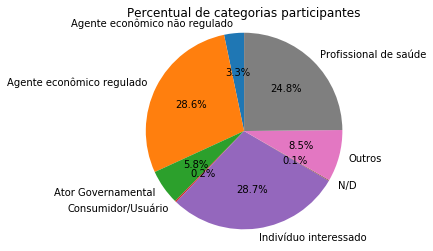

In [15]:
#PLOT 1

fig1, ax1 = plt.subplots()
ax1.pie(porcentagem, labels = porcentagem.keys(), autopct = '%1.1f%%',startangle=90 )
ax1.axis('equal')
plt.title("Percentual de categorias participantes")
plt.savefig('Categorias.png')

In [16]:
ent_cat = df.groupby(["Categoria_Participante", "Entidade_Representativa"]).size()

In [17]:
ent_cat

Categoria_Participante         Entidade_Representativa
Agente econômico não regulado  Não                         55
                               Sim                         14
Agente econômico regulado      Não                        346
                               Sim                        257
Ator Governamental             Não                        102
                               Sim                         20
Consumidor/Usuário             Sim                          5
Indivíduo interessado          Não                        605
N/D                            N/D                          3
Outros                         Não                        135
                               Sim                         44
Profissional de saúde          Não                        494
                               Sim                         30
dtype: int64

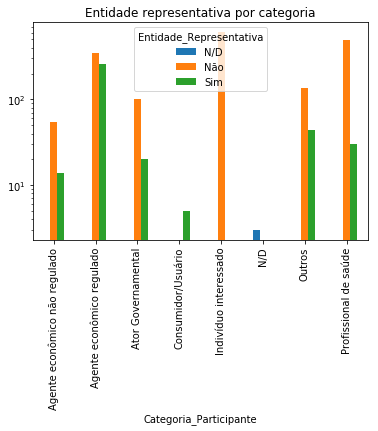

In [18]:
#PLOT 2
df.groupby(["Categoria_Participante", "Entidade_Representativa"]).Quem.count().unstack().reset_index()\
.plot.bar(x = "Categoria_Participante").set_yscale('log')
plt.title("Entidade representativa por categoria")
plt.savefig('EntidadexCategoria.png')

In [19]:
colunas = []
for i in range(0, len(porcentagem.keys())):
    colunas.append(porcentagem.keys()[i])

In [20]:
colunas

['Agente econômico não regulado',
 'Agente econômico regulado',
 'Ator Governamental',
 'Consumidor/Usuário',
 'Indivíduo interessado',
 'N/D',
 'Outros',
 'Profissional de saúde']

In [21]:
df_w_na = df

In [22]:
df_w_na.tail()

,Quem,Personalidade,Entidade_Representativa,Categoria_Participante,Estatal,Numero_Manifestacoes,Sim_impacto,Nao_impacto,N/D_impacto,N/A_impacto,N/C_impacto
2180,Pessoa 2181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2181,Pessoa 2182,PJ,Não,Ator Governamental,Sim,0,NaN,NaN,0,NaN,NaN
2182,Pessoa 2183,PJ,Não,Agente econômico regulado,Não,1,NaN,NaN,1,NaN,NaN
2183,Pessoa 2184,NaN,NaN,NaN,NaN,1254,624,304,NaN,326,NaN
2184,Pessoa 2185,NaN,NaN,NaN,NaN,10,3,7,NaN,NaN,NaN


In [23]:
df["Numero_Manifestacoes"] = df_w_na["Numero_Manifestacoes"].fillna('0')
df["Sim_impacto"] = df_w_na["Sim_impacto"].fillna('0')
df["Nao_impacto"] = df_w_na["Nao_impacto"].fillna('0')
df["N/D_impacto"] = df_w_na["N/D_impacto"].fillna('0')
df["N/A_impacto"] = df_w_na["N/A_impacto"].fillna('0')
df["N/C_impacto"] = df_w_na["N/C_impacto"].fillna('0')

In [24]:
df.groupby(['Personalidade', "Estatal"])["Quem"].count().unstack()

Estatal,N/D,Não,Sim
Personalidade,,,
N/C,NaN,4.0,5.0
N/D,3.0,NaN,1.0
PF,NaN,1096.0,NaN
PJ,3.0,839.0,162.0


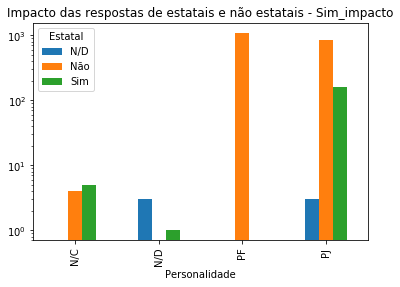

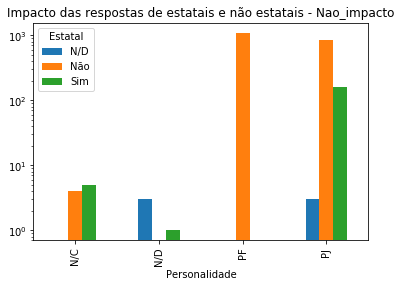

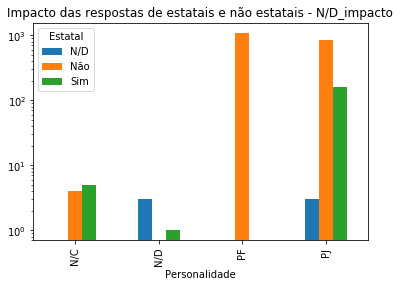

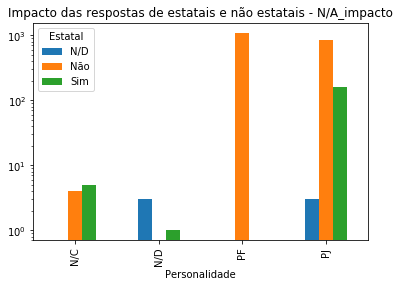

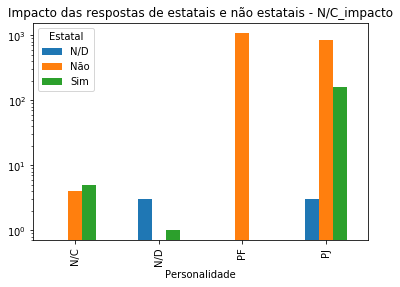

In [25]:
df.groupby(['Personalidade', "Estatal"])["Sim_impacto"].count().unstack().reset_index()\
.plot.bar(x = "Personalidade").set_yscale('log')
plt.title("Impacto das respostas de estatais e não estatais - Sim_impacto")

df.groupby(['Personalidade', "Estatal"])["Nao_impacto"].count().unstack().reset_index()\
.plot.bar(x = "Personalidade").set_yscale('log')
plt.title("Impacto das respostas de estatais e não estatais - Nao_impacto")


df.groupby(['Personalidade', "Estatal"])["N/D_impacto"].count().unstack().reset_index()\
.plot.bar(x = "Personalidade").set_yscale('log')
plt.title("Impacto das respostas de estatais e não estatais - N/D_impacto")

df.groupby(['Personalidade', "Estatal"])["N/A_impacto"].count().unstack().reset_index()\
.plot.bar(x = "Personalidade").set_yscale('log')
plt.title("Impacto das respostas de estatais e não estatais - N/A_impacto")

df.groupby(['Personalidade', "Estatal"])["N/C_impacto"].count().unstack().reset_index()\
.plot.bar(x = "Personalidade").set_yscale('log')
plt.title("Impacto das respostas de estatais e não estatais - N/C_impacto")

plt.show()
#plt.savefig("EstatalxPersonalidade")

#["Sim_impacto", 'Nao_impacto', 'N/D_impacto','N/A_impacto', 'N/C_impacto']

In [26]:
df.groupby(['Personalidade', "Estatal"])["Sim_impacto"].count()


Personalidade  Estatal
N/C            Não           4
               Sim           5
N/D            N/D           3
               Sim           1
PF             Não        1096
PJ             N/D           3
               Não         839
               Sim         162
Name: Sim_impacto, dtype: int64

In [27]:
df.Entidade_Representativa = df.Entidade_Representativa.astype("category")
df.head()

,Quem,Personalidade,Entidade_Representativa,Categoria_Participante,Estatal,Numero_Manifestacoes,Sim_impacto,Nao_impacto,N/D_impacto,N/A_impacto,N/C_impacto
0,Pessoa 1,PJ,Sim,Agente econômico regulado,Não,2,0,2,0,0,0
1,Pessoa 2,PJ,Sim,Agente econômico regulado,Não,8,3,5,0,0,0
2,Pessoa 3,PF,Não,Profissional de saúde,Não,9,2,7,0,0,0
3,Pessoa 4,PF,Não,Profissional de saúde,Não,6,1,5,0,0,0
4,Pessoa 5,PJ,Sim,Outros,Não,17,1,16,0,0,0


In [28]:
df.groupby(['Entidade_Representativa'])["Sim_impacto", 'Nao_impacto', 'N/D_impacto','N/A_impacto', 'N/C_impacto'].count()


,Sim_impacto,Nao_impacto,N/D_impacto,N/A_impacto,N/C_impacto
Entidade_Representativa,,,,,
N/D,3,3,3,3,3
Não,1739,1739,1739,1739,1739
Sim,371,371,371,371,371


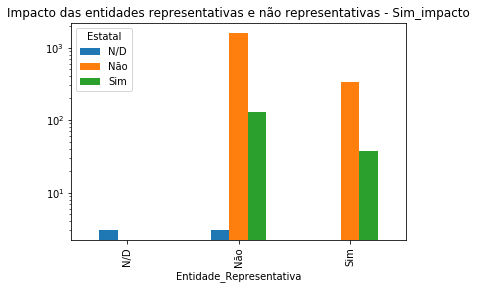

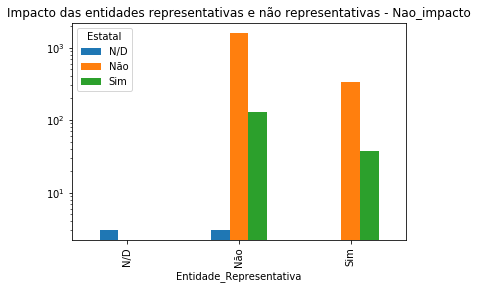

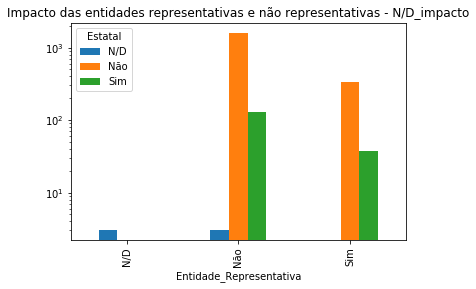

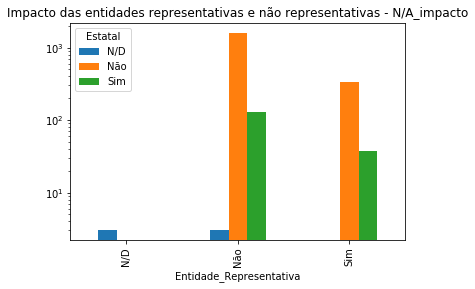

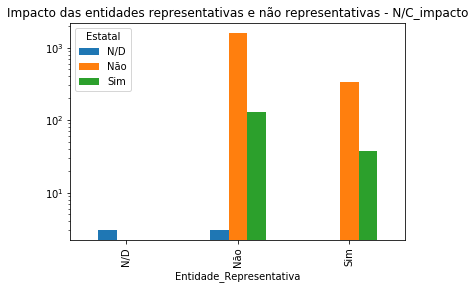

In [29]:
#PLOT 4

df.groupby(['Entidade_Representativa', "Estatal"])["Sim_impacto"].count().unstack().reset_index()\
.plot.bar(x = "Entidade_Representativa").set_yscale('log')
plt.title("Impacto das entidades representativas e não representativas - Sim_impacto")

df.groupby(['Entidade_Representativa', "Estatal"])["Nao_impacto"].count().unstack().reset_index()\
.plot.bar(x = "Entidade_Representativa").set_yscale('log')
plt.title("Impacto das entidades representativas e não representativas - Nao_impacto")


df.groupby(['Entidade_Representativa', "Estatal"])["N/D_impacto"].count().unstack().reset_index()\
.plot.bar(x = "Entidade_Representativa").set_yscale('log')
plt.title("Impacto das entidades representativas e não representativas - N/D_impacto")

df.groupby(['Entidade_Representativa', "Estatal"])["N/A_impacto"].count().unstack().reset_index()\
.plot.bar(x = "Entidade_Representativa").set_yscale('log')
plt.title("Impacto das entidades representativas e não representativas - N/A_impacto")

df.groupby(['Entidade_Representativa', "Estatal"])["N/C_impacto"].count().unstack().reset_index()\
.plot.bar(x = "Entidade_Representativa").set_yscale('log')
plt.title("Impacto das entidades representativas e não representativas - N/C_impacto")

plt.show()

In [30]:
df.groupby('Entidade_Representativa')["Sim_impacto", 'Nao_impacto', 'N/D_impacto','N/A_impacto', 'N/C_impacto'].count()


,Sim_impacto,Nao_impacto,N/D_impacto,N/A_impacto,N/C_impacto
Entidade_Representativa,,,,,
N/D,3,3,3,3,3
Não,1739,1739,1739,1739,1739
Sim,371,371,371,371,371


In [31]:
df.columns

Index(['Quem', 'Personalidade', 'Entidade_Representativa',
       'Categoria_Participante', 'Estatal', 'Numero_Manifestacoes',
       'Sim_impacto', 'Nao_impacto', 'N/D_impacto', 'N/A_impacto',
       'N/C_impacto'],
      dtype='object')

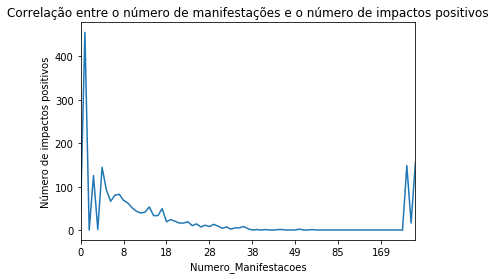

In [32]:
#PLOT 5

ts = df.groupby(['Numero_Manifestacoes'])["Sim_impacto"].count()
ts.plot()
plt.ylabel('Número de impactos positivos')
plt.title('Correlação entre o número de manifestações e o número de impactos positivos')
plt.savefig('Impacto Positivo N Manifestacoes')

In [33]:
df.head()

,Quem,Personalidade,Entidade_Representativa,Categoria_Participante,Estatal,Numero_Manifestacoes,Sim_impacto,Nao_impacto,N/D_impacto,N/A_impacto,N/C_impacto
0,Pessoa 1,PJ,Sim,Agente econômico regulado,Não,2,0,2,0,0,0
1,Pessoa 2,PJ,Sim,Agente econômico regulado,Não,8,3,5,0,0,0
2,Pessoa 3,PF,Não,Profissional de saúde,Não,9,2,7,0,0,0
3,Pessoa 4,PF,Não,Profissional de saúde,Não,6,1,5,0,0,0
4,Pessoa 5,PJ,Sim,Outros,Não,17,1,16,0,0,0


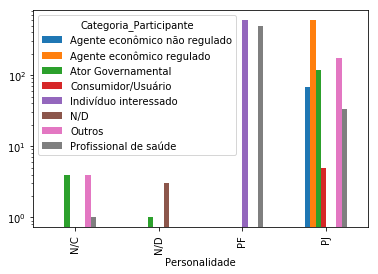

In [34]:
#PLOT 6
df.groupby(['Personalidade', "Categoria_Participante"])["Quem"].count().unstack().plot.bar().set_yscale("log")